In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',250)
from sklearn.impute import KNNImputer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tqdm import tqdm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
train=pd.read_csv(r'C:\Users\Admin\Desktop\US-stocks-prediction\Cleaning\train.csv')
test=pd.read_csv(r'C:\Users\Admin\Desktop\US-stocks-prediction\Cleaning\test.csv')

In [20]:
x=train.groupby('Class').count()
x

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share),5Y Op

In [21]:
x=x.reset_index()
x=x.rename(columns={'Revenue':'Count'})

<AxesSubplot:xlabel='Class'>

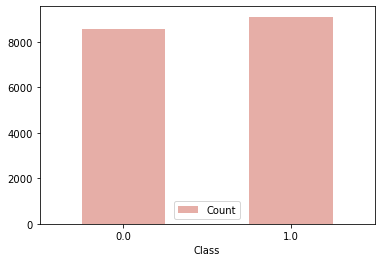

In [22]:
x.plot.bar(x='Class', y='Count', rot=0,color=(0.85,0.52,0.48,0.66))

In [23]:
X_train=train.drop(['Class','PRICE_VAR'],1)
y_train=train['Class']
X_test=test.drop(['Class','PRICE_VAR'],1)
y_test=test['Class']

In [24]:
cor_matrix = X_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                    Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Revenue                 NaN        0.001959         0.978758      0.806340   
Revenue Growth          NaN             NaN         0.001541      0.002820   
Cost of Revenue         NaN             NaN              NaN      0.677541   
Gross Profit            NaN             NaN              NaN           NaN   
R&D Expenses            NaN             NaN              NaN           NaN   
...                     ...             ...              ...           ...   
Sector_Healthcare       NaN             NaN              NaN           NaN   
Sector_Industrials      NaN             NaN              NaN           NaN   
Sector_Real Estate      NaN             NaN              NaN           NaN   
Sector_Technology       NaN             NaN              NaN           NaN   
Sector_Utilities        NaN             NaN              NaN           NaN   

                    R&D Expenses  SG&A Expense  Operating Expen

In [25]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]

In [26]:
to_drop

['Cost of Revenue',
 'Gross Profit',
 'SG&A Expense',
 'Operating Expenses',
 'Earnings before Tax',
 'Net Income Com',
 'EPS Diluted',
 'Weighted Average Shs Out (Dil)',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Inventories',
 'Property, Plant & Equipment Net',
 'Total current liabilities',
 'Long-term debt',
 'Total debt',
 'Deferred revenue',
 'Tax Liabilities',
 'Deposit Liabilities',
 'Total non-current liabilities',
 'Total liabilities',
 'Other comprehensive income',
 'Total shareholders equity',
 'Investments',
 'Net Debt',
 'Other Assets',
 'Other Liabilities',
 'Capital Expenditure',
 'priceToBookRatio',
 'priceSalesRatio',
 'ebitperRevenue',
 'pretaxProfitMargin',
 'netProfitMargin',
 'returnOnEquity',
 'nIperEBT',
 'eBTperEBIT',
 'eBITperRevenue',
 'cashRatio',
 'companyEquityMultiplier',
 'cashFlowCoverageRatios',
 'Net Income per Share',
 'Operating Cash Flow per Share',
 

In [27]:
X_train=X_train.drop(to_drop, axis=1)
X_test=X_test.drop(to_drop, axis=1)

In [28]:
X=pd.concat([X_train,X_test])
y=pd.concat([y_train,y_test])

In [29]:
scalers = [StandardScaler(),MinMaxScaler()]

In [30]:
for scaler in scalers:    
    model = LogisticRegression(solver='liblinear')
    pipeline = Pipeline([('s',scaler),('m',model)])
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    m_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # summarize the result
    print('Accuracy: %.3f (%.3f)' % (mean(m_scores), std(m_scores)))

Accuracy: 0.647 (0.006)
Accuracy: 0.647 (0.006)


In [31]:
X_train2=StandardScaler().fit_transform(X_train)
X_train2 = pd.DataFrame(X_train2)
X_train2.columns = list(X_train)
X_test2=StandardScaler().transform(X_test)
X_test2 = pd.DataFrame(X_test2)
X_test2.columns = list(X_test)

In [32]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

models = [LR,DT,RF,NB,KNN]

In [33]:
accuracy, precision, recall = {}, {}, {}

for model in tqdm(models):
    
    # Fit the classifier model
    model.fit(X_train2, y_train)
    
    predictions = model.predict(X_test2)
    
    # Prediction 
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[model] = accuracy_score(predictions, y_test)
    precision[model] = precision_score(predictions, y_test)
    recall[model] = recall_score(predictions, y_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.72s/it]


In [34]:
df_model = pd.DataFrame(index=models, columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision  \
LogisticRegression(solver='liblinear')              0.563069   0.594550   
DecisionTreeClassifier()                            0.485428   0.444846   
(DecisionTreeClassifier(max_features='auto', ra...  0.468124   0.395601   
GaussianNB()                                        0.683743   0.959947   
KNeighborsClassifier()                              0.578324   0.581418   

                                                      Recall  
LogisticRegression(solver='liblinear')              0.725852  
DecisionTreeClassifier()                            0.704262  
(DecisionTreeClassifier(max_features='auto', ra...  0.708824  
GaussianNB()                                        0.697686  
KNeighborsClassifier()                              0.754259

In [38]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=cv,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


{'var_smoothing': 1e-09}

In [39]:
param_grid_nb = {
    'var_smoothing': [1e-09]
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train2, y_train)
y_pred = nbModel_grid.predict(X_test2)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [40]:
print( accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print( recall_score(y_test,y_pred))

0.6837431693989071
0.6976855165831544
0.9599474720945502


In [44]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[  79, 1267],
       [ 122, 2924]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.39      0.06      0.10      1346
         1.0       0.70      0.96      0.81      3046

    accuracy                           0.68      4392
   macro avg       0.55      0.51      0.46      4392
weighted avg       0.60      0.68      0.59      4392



<AxesSubplot:>

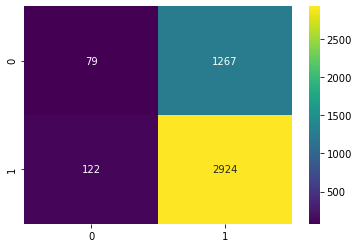

In [46]:
import seaborn as sns
sns.heatmap(cf, annot=True,fmt="d",cmap='viridis')